In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

In [ ]:
data_serial = pd.read_csv('serial_time.txt')
data_parallel = pd.read_csv('parallel_code.txt')

In [ ]:
data_parallel.drop(columns='Unnamed: 3',inplace=True)
data_serial.drop(columns='Unnamed: 2',inplace=True)

In [ ]:
data_serial_mean = data_serial.groupby('problema',as_index=False)['tempo_serial'].mean()
data_serial_mean

,problema,tempo_serial
0,128000,30.8
1,140000,36.8
2,150000,42.4
3,160000,48.0


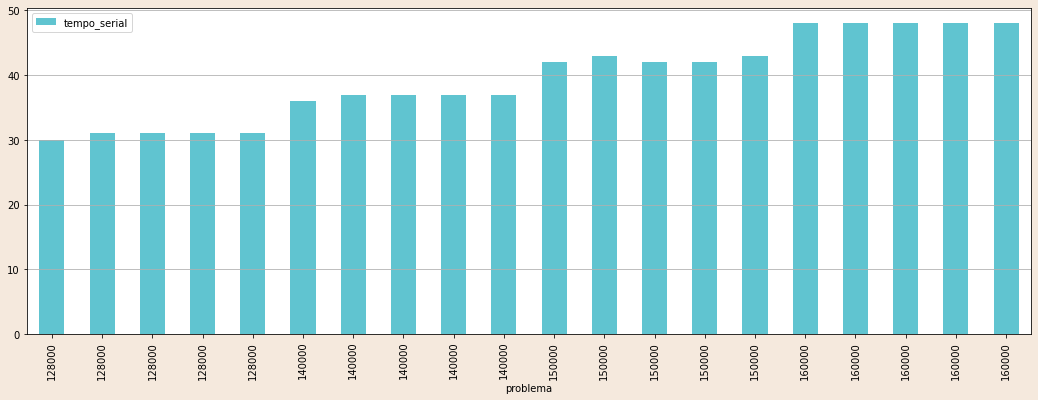

In [ ]:
# data_serial.set_index('problema').plot(kind='bar')
fig, ax = plt.subplots(ncols=1,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')
data = data_serial.set_index('problema')
data.plot(kind='bar', ax=ax,color='#60c4d0')
ax.yaxis.grid(True)

plt.savefig('serial_tempo_bar.png')
plt.show()

In [ ]:
data_parallel_mean = data_parallel.groupby(['cores','problema'], as_index=False)['tempo_paralelo'].mean()
data_parallel_mean

,cores,problema,tempo_paralelo
0,2,128000,29.25
1,2,140000,36.20
2,2,150000,41.40
3,2,160000,46.80
4,4,128000,31.20
5,4,140000,37.20
6,4,150000,42.60
7,4,160000,48.00
8,8,128000,24.40
9,8,140000,29.00


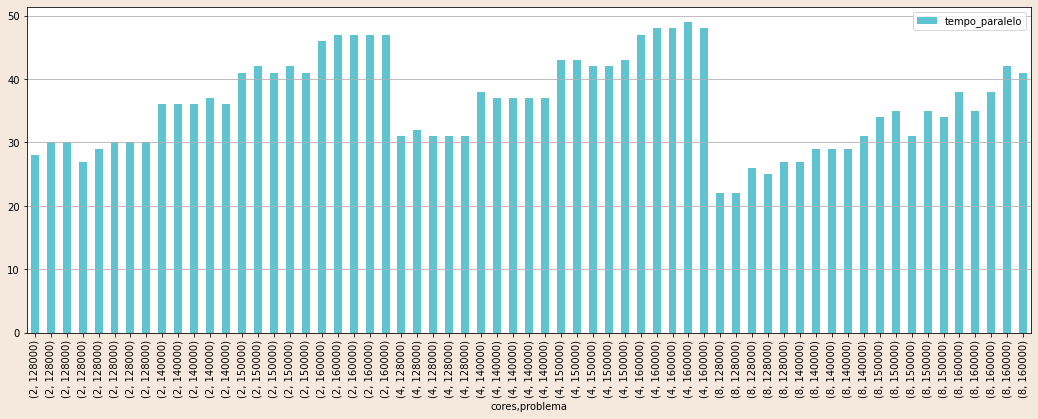

In [ ]:
# data_parallel.set_index(['cores','problema']).plot(figsize=(15,5),kind='bar')
fig, ax = plt.subplots(ncols=1,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')
data = data_parallel.set_index(['cores','problema'])
data.plot(kind='bar', ax=ax,color='#60c4d0')
ax.yaxis.grid(True)

plt.savefig('paralelo_tempos_bar.png')
plt.show()

In [ ]:
data_parallel_mean['tempo_serial']=[*data_serial_mean.tempo_serial.values,*data_serial_mean.tempo_serial.values,*data_serial_mean.tempo_serial.values]

In [ ]:
 data_parallel_mean['speedup']= data_parallel_mean['tempo_serial'] / data_parallel_mean['tempo_paralelo'] 
 data_parallel_mean['eficiencia'] = data_parallel_mean['speedup']  / data_parallel_mean['cores'] 

In [ ]:
data_parallel_mean

,cores,problema,tempo_paralelo,tempo_serial,speedup,eficiencia
0,2,128000,29.25,30.8,1.052991,0.526496
1,2,140000,36.20,36.8,1.016575,0.508287
2,2,150000,41.40,42.4,1.024155,0.512077
3,2,160000,46.80,48.0,1.025641,0.512821
4,4,128000,31.20,30.8,0.987179,0.246795
5,4,140000,37.20,36.8,0.989247,0.247312
6,4,150000,42.60,42.4,0.995305,0.248826
7,4,160000,48.00,48.0,1.000000,0.250000
8,8,128000,24.40,30.8,1.262295,0.157787
9,8,140000,29.00,36.8,1.268966,0.158621


In [ ]:
fig =  ff.create_table(data_parallel_mean[1:])
fig.update_layout(
    autosize=True,
    
)
# fig.write_image("table_plotly.png", scale=2)
fig.show()

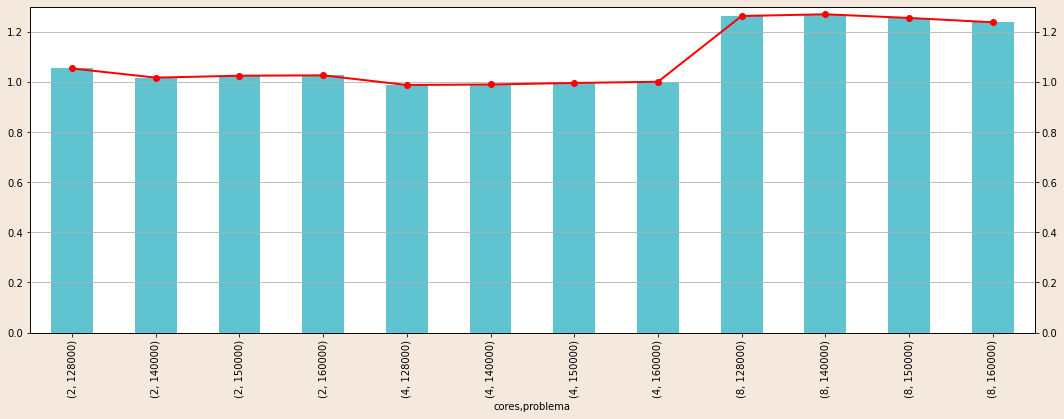

In [ ]:
fig, ax = plt.subplots(ncols=1,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')
data = data_parallel_mean.set_index(['cores','problema'])['speedup']
data.plot(kind='bar', ax=ax,color='#60c4d0')
ax.yaxis.grid(True)
ax_twinx = ax.twinx()
ax_twinx.plot(ax.get_xticks(),data.values,linestyle='-', marker='o', linewidth=2.0, color='red')
ax_twinx.set_ylim(0,1.3)
ax.set_ylim(0,1.3)


plt.savefig('speedup.png')
plt.show()

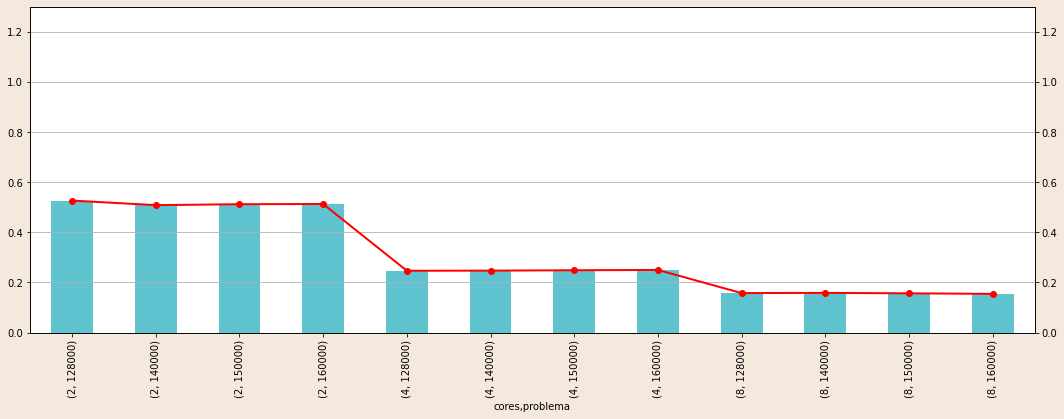

In [ ]:
fig, ax = plt.subplots(ncols=1,figsize=(18,6))
ax_twinx = []
fig.set_facecolor('#f5e9dd')
data = data_parallel_mean.set_index(['cores','problema'])['eficiencia']
data.plot(kind='bar', ax=ax,color='#60c4d0')
ax.yaxis.grid(True)
ax_twinx = ax.twinx()
ax_twinx.plot(ax.get_xticks(),data.values,linestyle='-', marker='o', linewidth=2.0, color='red')
ax_twinx.set_ylim(0,1.3)
ax.set_ylim(0,1.3)


plt.savefig('eficiencia.png')
plt.show()